In [22]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

## Looking at Client Models

In [3]:
client_models_folder = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\models\cphs\Local"
#client_0_local_client_model
file_prefix = r"\client_"
file_num = 0
file_suffix = r"_local_client_model.pt"

sample_path = client_models_folder + file_prefix + str(file_num) + file_suffix
print(sample_path)

model_list = [0]*14

print_models = False
if print_models:
    for i in range(14):
        path = client_models_folder + file_prefix + str(i) + file_suffix
        model_list[i] = torch.load(path) 
        print(model_list[i].weight)
        print()
        print()

C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\models\cphs\Local\client_0_local_client_model.pt


## H5 Files

KEYS
Keys: <KeysViewHDF5 ['cost_func_tuples_by_client', 'gradient_norm_lists_by_client', 'rs_test_loss', 'rs_train_loss']>

a_group_key AKA list(f.keys())[0]
cost_func_tuples_by_client
--------------------------------------

COST_FUNC_TUPLES_BY_CLIENT
Data AKA list(f[a_group_key])
['ClientID0', 'ClientID1', 'ClientID10', 'ClientID11', 'ClientID12', 'ClientID13', 'ClientID2', 'ClientID3', 'ClientID4', 'ClientID5', 'ClientID6', 'ClientID7', 'ClientID8', 'ClientID9']

Group AKA f[a_group_key]
<HDF5 group "/cost_func_tuples_by_client" (14 members)>

<class 'numpy.ndarray'>
[[0.00015998 0.00031852 0.        ]]
--------------------------------------

GRADIENT_NORM_LOG
len() of grad_norm_log_Cli0
101
--------------------------------------

RS_TRAIN_LOSS
rs_train_loss_GROUP: <HDF5 dataset "rs_train_loss": shape (100,), type "<f8">
rs_train_loss_GROUP is a numpy array with 100 entries. NO CLIENT BREAK UP.


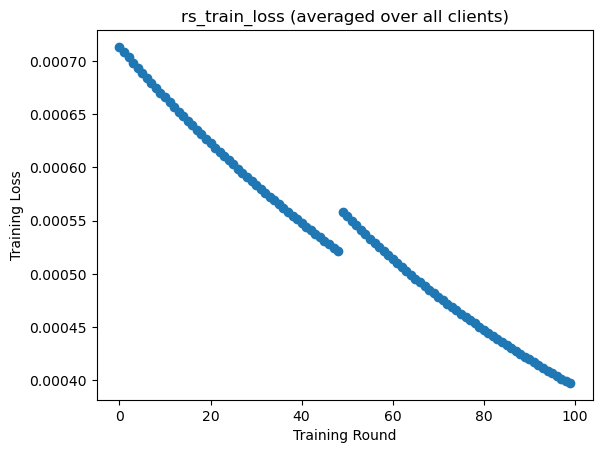

--------------------------------------

RS_TEST_LOSS
rs_test_loss_GROUP: <HDF5 dataset "rs_test_loss": shape (101,), type "<f8">
rs_test_loss_GROUP is a numpy array with 100 entries. NO CLIENT BREAK UP.


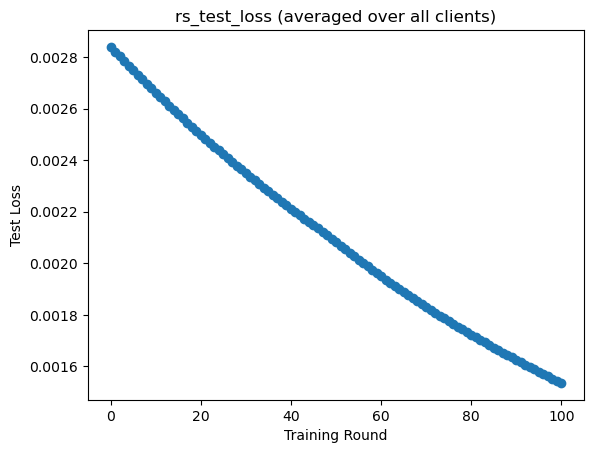

In [32]:
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\first_success"
pfsr1 = r"mdHM_08-07_18-06_cphs_Local_test_0.h5"
pfsr2 = r"mdHM_08-07_15-36_cphs_Local_test_0.h5"

with h5py.File(os.path.join(h5_path, pfsr1), 'r') as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("KEYS")
    print("Keys: %s" % f.keys())
    print()
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    print("a_group_key AKA list(f.keys())[0]")
    print(a_group_key)
    print("--------------------------------------")
    print()

    # get the object type for a_group_key: usually group or dataset
    #print(type(f[a_group_key])) 

    print("COST_FUNC_TUPLES_BY_CLIENT")#cost_func_tuples_by_client
    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])
    print("Data AKA list(f[a_group_key])")
    print(data)
    print()

    # preferred methods to get dataset values:
    #ds_obj = f[a_group_key]      # returns as a h5py dataset object
    #ds_arr = f[a_group_key][()]  # returns as a numpy array
    
    group = f[a_group_key]
    print("Group AKA f[a_group_key]")
    print(group)
    print()
    #dataset = group['dataset_name']
    #data_array = group[()]
    specific_member = group['ClientID0'][()]
    print(type(specific_member))
    print(specific_member)
    print("--------------------------------------")
    print()
    
    print("GRADIENT_NORM_LOG")
    grad_norm_log_GROUP = f['gradient_norm_lists_by_client']
    grad_norm_log_Cli0 = grad_norm_log_GROUP['ClientID0'][()]
    print("len() of grad_norm_log_Cli0")
    print(len(grad_norm_log_Cli0))
    print("--------------------------------------")
    print()
    
    print("RS_TRAIN_LOSS")
    rs_train_loss_GROUP = f['rs_train_loss']
    print(f"rs_train_loss_GROUP: {rs_train_loss_GROUP}")
    print("rs_train_loss_GROUP is a numpy array with 100 entries. NO CLIENT BREAK UP.")
    plt.scatter(range(len(rs_train_loss_GROUP[()])), rs_train_loss_GROUP[()])
    plt.title("rs_train_loss (averaged over all clients)")
    plt.xlabel("Training Round")
    plt.ylabel("Training Loss")
    plt.show()
    print("--------------------------------------")
    print()
    
    print("RS_TEST_LOSS")
    rs_test_loss_GROUP = f['rs_test_loss']
    print(f"rs_test_loss_GROUP: {rs_test_loss_GROUP}")
    print("rs_test_loss_GROUP is a numpy array with 100 entries. NO CLIENT BREAK UP.")
    plt.scatter(range(len(rs_test_loss_GROUP[()])), rs_test_loss_GROUP[()])
    plt.title("rs_test_loss (averaged over all clients)")
    plt.xlabel("Training Round")
    plt.ylabel("Test Loss")
    plt.show()
    #print("--------------------------------------")
    #print()

## Models

In [ ]:
models_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\models\cphs\Local"
today1 = "08-08_12-07"
today2 = "08-08_12-56"
fsr = "First_Successful_Run"
pca = "PCA_On_08-07_18-06"


In [ ]:
with h5py.File('../results/cphs_Local_test_0.h5', 'r') as f:
    print("Success1")
    print(list(f))
    data = f['rs_train_loss']
    print(len(data))
    print(np.array(data))
    

In [ ]:
with h5py.File('../results/cphs_Local_test_0.h5', 'r') as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

In [ ]:
item_path = r'C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\models\cphs'
#torch.save(item, os.path.join(item_path, "client_" + str(self.id) + "_" + item_name + ".pt"))
#my_model_file = os.path.join(item_path, "client_" + str(self.id) + "_" + item_name + ".pt")
my_model_file = os.path.join(item_path, "Local_server.pt")

# Load the file
local_model = torch.load(my_model_file)

# Print the head of the file
print(local_model)

In [ ]:
#for param in local_model.parameters():
#    print(param)
# or
print("Name: Param")
for name, param in local_model.named_parameters():
    print(f"{name}: {param}")